<a href="https://colab.research.google.com/github/varundeepAvi/Assignments/blob/main/21mar_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Multiple Linear Regression

Importing the dataset Encoding categorical data Avoiding the Dummy Variable Trap Splitting the dataset into the Training set and Test set Fitting Multiple Linear Regression to the Training set Predicting the Test set results Building the optimal model using Backward Elimination

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Example file path
file_path = "/content/drive/MyDrive/Colab Notebooks/50_Startups.csv"

# Read CSV file into a DataFrame
df = pd.read_csv(file_path)

In [4]:
Startups=pd.read_csv(file_path)
Startups




,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
Startups_encoded=pd.get_dummies(Startups,columns=['State'],drop_first=True)
Startups_encoded


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [6]:
X=Startups_encoded[['R&D Spend','Administration','Marketing Spend']]
y=Startups_encoded['Profit']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.6,random_state=42)


In [7]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [8]:
predictions=model.predict(X_test)
print(f'Predictions with test data for profit made by startups:{predictions}')


Predictions with test data for profit made by startups:[126670.49469173  86181.89095365  99038.2973952   47095.72206913
 129014.33822131  52702.93758056 108677.70605423 100780.40249178
  97456.88830016 111988.33432125 128730.31234937 173838.2569878
  93938.77318801 150146.82629499 173944.04045521 154986.28077585
  77255.44317167  58301.10493646  45300.62790411 145840.28705938]


In [9]:
Score=r2_score(y_test,predictions)
print(f'The R2 score of the model is : {Score}')


The R2 score of the model is : 0.9533559712812131


<Axes: xlabel='Profit'>

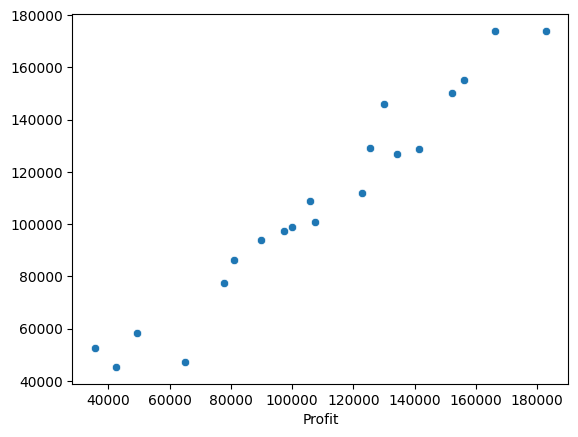

In [10]:
sns.scatterplot(x=y_test,y=predictions)


In [11]:
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()

while True:
  p_values=model.pvalues[1:]
  max_p_values=p_values.max()
  if max_p_values>0.05:
    remove_index=p_values.idxmax()
    X=X.drop(remove_index,axis=1)
    model = sm.OLS(y, X).fit()
  else:
    break


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           3.50e-32
Time:                        05:18:47   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0